# Nama : Mohamad Ivan Hegiansyah
# NIM  : 1301190219
# Kelas: IF-43-03

Import library yang akan digunakan untuk mengerjakan tugas besar 1 ini

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
import warnings
import random

Mengunduh dataset

In [2]:
!gdown --id 19srNegNqnY1QrabxNpStf12YLo2IZW_5

Downloading...
From: https://drive.google.com/uc?id=19srNegNqnY1QrabxNpStf12YLo2IZW_5
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 134MB/s]


Ambil Data dan disimpan pada variable df

In [3]:
df = pd.read_csv('kendaraan_train.csv')
df

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## Preperation Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [5]:
df.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

## Preprocessing Data

In [6]:
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [7]:
#drop data yang tidak penting 
df.drop(['id', 'Tertarik'], axis=1, inplace=True)

#drop duplikat value
df = df.drop_duplicates()

# pisahkan data numeric dan kategorikal
num_col = ["Umur", "Premi", "Lama_Berlangganan"]
cat_col = [i for i in df if i not in num_col]
x_num = df[num_col].copy()
x_cat = df[cat_col].copy()
    
# var mean imputer untuk kolom numeric 
mean_imputer = SimpleImputer(missing_values=np.nan, strategy="mean").fit(x_num)
    
# var mode imputer untuk kolom kategorikal
mode_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent").fit(x_cat)
    
# terapkan imputer
x_num = pd.DataFrame(mean_imputer.transform(x_num), columns=num_col)
x_cat = pd.DataFrame(mode_imputer.transform(x_cat), columns=cat_col)
    
# label encoder untuk Umur_Kendaraan dan Kendaraan_Rusak
umur_kendaraan_encoder = {"> 2 Tahun" : 0, "1-2 Tahun" : 1, "< 1 Tahun" : 2}
kendaraan_rusak_encoder = {"Pernah" : 0, "Tidak" : 1}

# terapkan label
x_cat = x_cat.replace({"Umur_Kendaraan" : umur_kendaraan_encoder,
                       "Kendaraan_Rusak" : kendaraan_rusak_encoder})

# onehot encoder untuk Jenis_Kelamin
jenis_kelamin = x_cat.Jenis_Kelamin.to_numpy().reshape(-1,1)
onehot_encoder = OneHotEncoder().fit(jenis_kelamin)

# terapkan onehot encoder ke Jenis_Kelamin
jenis_kelamin = pd.DataFrame(
    onehot_encoder.transform(jenis_kelamin).todense(),
    columns=onehot_encoder.categories_[0])

# concat semua preprocessed data dan konversi semua data ke float agar konsisten
df_preprocessed = pd.concat([x_num, x_cat.drop("Jenis_Kelamin", axis=1),
                             jenis_kelamin], axis=1).astype("float64")

In [8]:
df_preprocessed.head()

,Umur,Premi,Lama_Berlangganan,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Kanal_Penjualan,Pria,Wanita
0,30.0,28029.0,97.0,1.0,33.0,1.0,2.0,1.0,152.0,0.0,1.0
1,48.0,25800.0,158.0,1.0,39.0,0.0,0.0,0.0,29.0,1.0,0.0
2,21.0,32733.0,119.0,1.0,46.0,1.0,2.0,1.0,160.0,1.0,0.0
3,58.0,2630.0,63.0,1.0,48.0,0.0,1.0,1.0,124.0,0.0,1.0
4,50.0,34857.0,194.0,1.0,35.0,0.0,0.0,0.0,88.0,1.0,0.0


## Data Exploration and Feature Selection

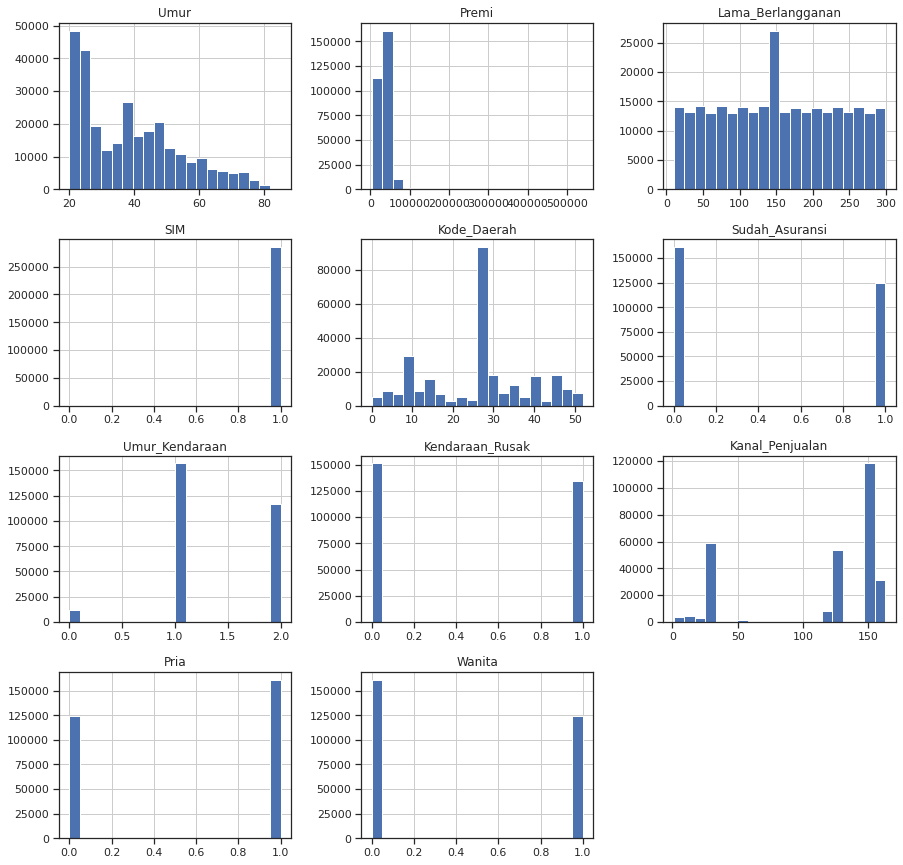

In [9]:
 #ignore warning yang muncul setelah diplot
 warnings.filterwarnings('ignore')

 #plot barchart
 sns.set_theme(style='ticks')
 _ = df_preprocessed.hist(figsize=(15, 15), bins=20)

In [10]:
def iqr(data, c=1.5):
    
    # ambil quartil 1 and 3
    desc = data.describe()
    Q1 = desc["25%"]
    Q3 = desc["75%"]
    
    # ambil interquartil range
    IQR = Q3 - Q1
    
    # ambil upper dan lower gate
    upper = Q3 + (IQR * c)
    lower = Q1 - (IQR * c)

    # return semua outlier index
    return data[(data < lower) | (data > upper)].index

# ambil outlier dari kolom Premi and drop outliernya
outlier = iqr(df_preprocessed.Premi)
df_preprocessed = df_preprocessed.drop(outlier).reset_index(drop=True)

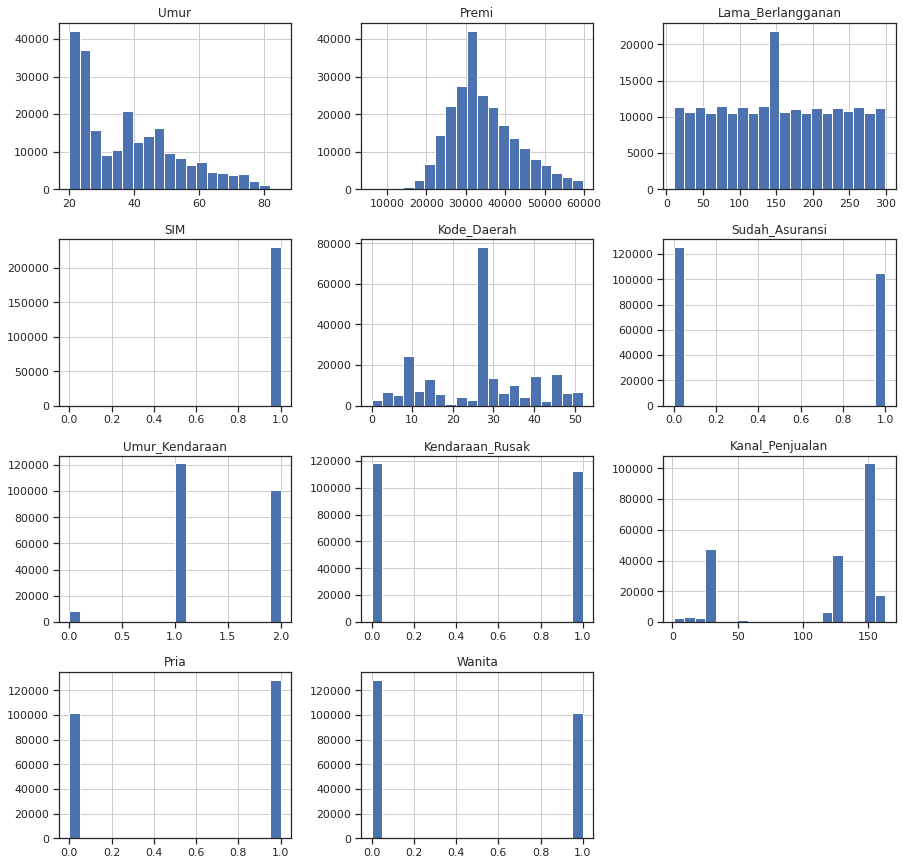

In [11]:
#Histogram setelah beberapa pencilan dihapus
_ = df_preprocessed.hist(figsize=(15, 15), bins=20)

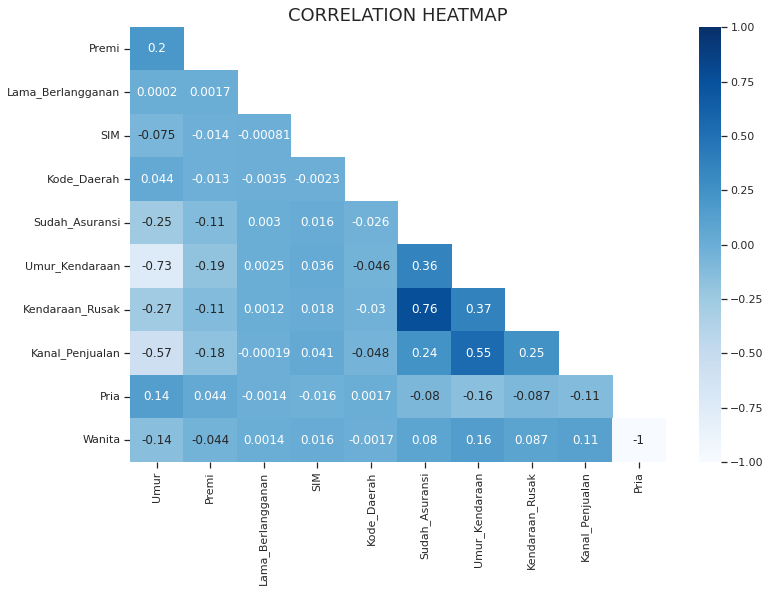

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
# mask
mask = np.triu(np.ones_like(df_preprocessed.corr(), dtype=np.bool))
# sesuaikan mask dan df
mask = mask[1:, :-1]
df_preprocessed_corr = df_preprocessed.corr()
corr = df_preprocessed_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, cmap='Blues',
           vmin=-1, vmax=1)
plt.title('CORRELATION HEATMAP', fontsize=18)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


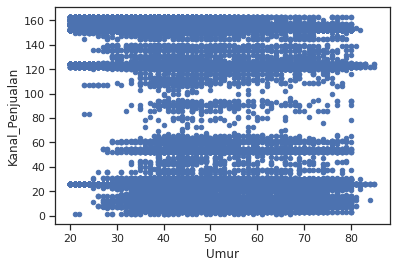

In [13]:
_ = df_preprocessed.plot(kind='scatter',x='Umur', y='Kanal_Penjualan')

In [14]:
#normalisasi data
col = [
  'Umur', 'Premi', 'Lama_Berlangganan', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi'
  , 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Kanal_Penjualan', 'Pria', 'Wanita'
]

scaler = MinMaxScaler()
df_preprocessed[col] = scaler.fit_transform(df_preprocessed[col].values)

In [15]:
df_preprocessed.head()

,Umur,Premi,Lama_Berlangganan,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Kanal_Penjualan,Pria,Wanita
0,0.153846,0.409000,0.301038,1.0,0.634615,1.0,1.0,1.0,0.932099,0.0,1.0
1,0.430769,0.367431,0.512111,1.0,0.750000,0.0,0.0,0.0,0.172840,1.0,0.0
2,0.015385,0.496727,0.377163,1.0,0.884615,1.0,1.0,1.0,0.981481,1.0,0.0
3,0.461538,0.536338,0.636678,1.0,0.673077,0.0,0.0,0.0,0.537037,1.0,0.0
4,0.015385,0.310270,0.557093,1.0,0.673077,1.0,1.0,1.0,0.932099,1.0,0.0


In [16]:
df_selection = df_preprocessed.copy()
features = ["Umur","Kanal_Penjualan"]
df_selection = df_selection[features]
df_selection.head()

,Umur,Kanal_Penjualan
0,0.153846,0.932099
1,0.430769,0.172840
2,0.015385,0.981481
3,0.461538,0.537037
4,0.015385,0.932099


## K-Means Algorithm

In [17]:
#definisikan rumus jarak
def euclid_dist(p,q):
  return np.sqrt(np.sum((p - q) ** 2))

In [18]:
def kmeans(df, K, limit):
  #menentukan jumlah kluster dan batas iterasi
 
  i_max = limit
 
  # Inisialisasi centorid
  old_centroid  =  {i : [np.random.choice(df[:,k]) for k in range(len(df[0]))] 
                    for i in range(K)}

  # membuat new centroid
  centroids = old_centroid.copy()

  # iterasi
  i = 0
  # cek apakah centroid yg lama sama dengan centroid baru jika tidak akan bernilai false
  condition = False
  # lakukan training
  while i <= i_max and condition == False:
    
    # print centorid baru
    print(f'i = {i}')
    for cent in centroids:
      print(f'Centroid {cent} : \n{centroids[cent]}')

    # mendefinisikan cluster 
    clusters = {i: [] for i in range(K)}
    
    # mencari jarak centrodi ke titik
    for titik in df:
      dist = [euclid_dist(titik, centroids[cent]) for cent in centroids]
      clusters[dist.index(min(dist))].append(titik)
    # menentukan centroid baru
    old_centroid = centroids.copy()
    for cl in clusters:
      centroids[cl] = np.mean(clusters[cl], axis=0)

    
    # buat kondisi dimana jika centroid sebelumnya sama dengan centroid sekarang maka diberhentikan
    for cent in old_centroid.keys():
      if list(centroids.get(cent)) == list(old_centroid.get(cent)):
        condition = True
    
    # tambah 1 i
    i = i + 1
  return centroids, clusters

df = df_selection.to_numpy()
centroids, clusters = kmeans(df, K=2, limit=300)

i = 0
Centroid 0 : 
[0.41538461538461546, 0.9259259259259258]
Centroid 1 : 
[0.0, 0.9320987654320987]
i = 1
Centroid 0 : 
[0.4566505  0.52567642]
Centroid 1 : 
[0.07404395 0.90262074]
i = 2
Centroid 0 : 
[0.49131757 0.4063163 ]
Centroid 1 : 
[0.12413003 0.91637998]
i = 3
Centroid 0 : 
[0.50964838 0.31598397]
Centroid 1 : 
[0.1595829  0.90130314]
i = 4
Centroid 0 : 
[0.50547503 0.24066174]
Centroid 1 : 
[0.18535571 0.89294498]
i = 5
Centroid 0 : 
[0.49230434 0.19596222]
Centroid 1 : 
[0.20065067 0.88868513]
i = 6
Centroid 0 : 
[0.47584237 0.16429157]
Centroid 1 : 
[0.21217401 0.88600253]
i = 7
Centroid 0 : 
[0.46896341 0.15413165]
Centroid 1 : 
[0.21608809 0.8851685 ]
i = 8
Centroid 0 : 
[0.46886688 0.15385697]
Centroid 1 : 
[0.21617094 0.88511756]
i = 9
Centroid 0 : 
[0.46885781 0.15384684]
Centroid 1 : 
[0.2161755  0.88511676]


In [19]:
colors = ['red', 'green', 'blue', 'yellow', 'brown', 'orange']
# mengubah kembali ke dataframe dan menambah kolom warna untuk visualisasi nantinya
def create_cluster(clusters):
  df_new = []
  for key in clusters.keys():
    for cl in clusters.get(key):
      df_new.append((cl[0], cl[1], key, colors[key]))
  df_new = pd.DataFrame(df_new)
  df_new.columns = ['Umur', 'Kanal_Penjualan', 'Cluster', 'Warna']
  return df_new

df_new = create_cluster(clusters)

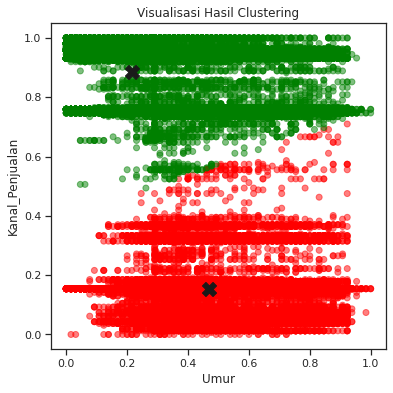

In [20]:
#plot scatter plot menggunakan library matplotlib
def plot_cluster(data):
  plt.figure(figsize=(6,6))
  plt.title('Visualisasi Hasil Clustering')
  plt.scatter(data['Umur'], data['Kanal_Penjualan'], color=data['Warna'], alpha=0.5)
  for i in centroids:
    plt.scatter(centroids[i][0], centroids[i][1], color='k', marker='X',s=200)

  plt.xlabel("Umur")
  plt.ylabel("Kanal_Penjualan")
  plt.show()

plot_cluster(df_new)

## Evaluation

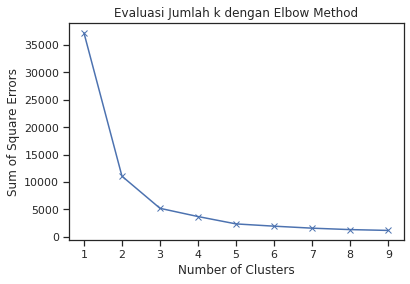

In [21]:
#evaluasi elbow methods
SSE = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_selection)
    SSE.append(km.inertia_)

plt.plot(K, SSE, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Square Errors')
plt.title('Evaluasi Jumlah k dengan Elbow Method')
plt.show()

## Experiment 1 : Using Different K

i = 0
Centroid 0 : 
[0.2153846153846154, 0.7592592592592592]
Centroid 1 : 
[0.046153846153846156, 0.9320987654320987]
Centroid 2 : 
[0.046153846153846156, 0.15432098765432098]
i = 1
Centroid 0 : 
[0.41720539 0.80714573]
Centroid 1 : 
[0.07271793 0.93751755]
Centroid 2 : 
[0.46552941 0.14985025]
i = 2
Centroid 0 : 
[0.43952812 0.81111898]
Centroid 1 : 
[0.07982333 0.92999337]
Centroid 2 : 
[0.46849795 0.15275852]
i = 3
Centroid 0 : 
[0.44603565 0.80906983]
Centroid 1 : 
[0.08333386 0.92878222]
Centroid 2 : 
[0.46848823 0.15276925]
i = 4
Centroid 0 : 
[0.44686768 0.80830159]
Centroid 1 : 
[0.08395673 0.9288542 ]
Centroid 2 : 
[0.468477   0.15275195]


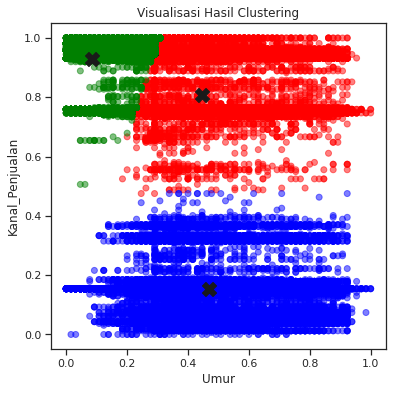

In [22]:
#mencoba dengan nilai k = 3
centroids, clusters = kmeans(df, K=3, limit=300)
df_new = create_cluster(clusters)
plot_cluster(df_new)

i = 0
Centroid 0 : 
[0.07692307692307693, 0.9320987654320987]
Centroid 1 : 
[0.289943797489591, 0.15432098765432098]
Centroid 2 : 
[0.289943797489591, 0.18518518518518517]
Centroid 3 : 
[0.23076923076923084, 0.15432098765432098]
i = 1
Centroid 0 : 
[0.21281885 0.88604744]
Centroid 1 : 
[0.50488716 0.14250658]
Centroid 2 : 
[0.55077107 0.36317102]
Centroid 3 : 
[0.1401495  0.14922676]
i = 2
Centroid 0 : 
[0.18529689 0.89281394]
Centroid 1 : 
[0.53795737 0.14404382]
Centroid 2 : 
[0.69042366 0.68087468]
Centroid 3 : 
[0.22302094 0.15139949]
i = 3
Centroid 0 : 
[0.14749528 0.90145307]
Centroid 1 : 
[0.57495835 0.15138122]
Centroid 2 : 
[0.61113114 0.78847836]
Centroid 3 : 
[0.2692976  0.15436358]
i = 4
Centroid 0 : 
[0.12809325 0.90842389]
Centroid 1 : 
[0.6098759  0.15166336]
Centroid 2 : 
[0.5530974  0.79510493]
Centroid 3 : 
[0.29978087 0.15422698]
i = 5
Centroid 0 : 
[0.11491133 0.91508909]
Centroid 1 : 
[0.63349887 0.1513353 ]
Centroid 2 : 
[0.51683278 0.79540369]
Centroid 3 : 
[0.31

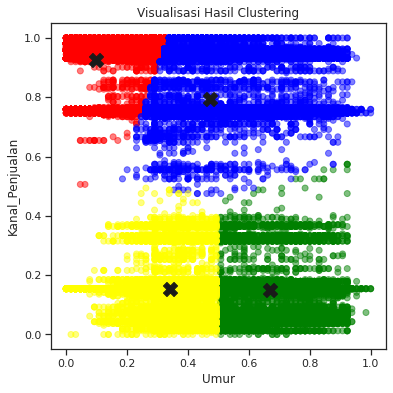

In [23]:
#mencoba dengan nilai k = 4
centroids, clusters = kmeans(df, K=4, limit=300)
df_new = create_cluster(clusters)
plot_cluster(df_new)

i = 0
Centroid 0 : 
[0.015384615384615385, 0.9320987654320987]
Centroid 1 : 
[0.046153846153846156, 0.7592592592592592]
Centroid 2 : 
[0.27692307692307694, 0.7592592592592592]
Centroid 3 : 
[0.1076923076923077, 0.9320987654320987]
Centroid 4 : 
[0.24615384615384617, 0.15432098765432098]
i = 1
Centroid 0 : 
[0.03866279 0.94098759]
Centroid 1 : 
[0.0907153  0.75774054]
Centroid 2 : 
[0.43649361 0.80484872]
Centroid 3 : 
[0.13104624 0.93641659]
Centroid 4 : 
[0.46845886 0.15265476]
i = 2
Centroid 0 : 
[0.04551203 0.93969244]
Centroid 1 : 
[0.18056385 0.75700392]
Centroid 2 : 
[0.47902882 0.79594977]
Centroid 3 : 
[0.1700468  0.93656779]
Centroid 4 : 
[0.46850618 0.15273451]
i = 3
Centroid 0 : 
[0.05050913 0.93925476]
Centroid 1 : 
[0.23970973 0.75678481]
Centroid 2 : 
[0.52638181 0.79775009]
Centroid 3 : 
[0.19633729 0.93720086]
Centroid 4 : 
[0.46848329 0.1526847 ]
i = 4
Centroid 0 : 
[0.05801093 0.93676561]
Centroid 1 : 
[0.28412501 0.75679995]
Centroid 2 : 
[0.57308491 0.80241191]
Cent

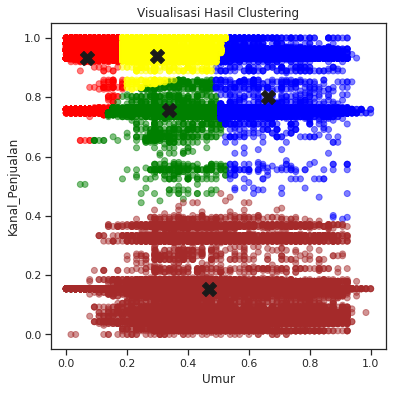

In [25]:
#mencoba dengan nilai k = 5
centroids, clusters = kmeans(df, K=5, limit=300)
df_new = create_cluster(clusters)
plot_cluster(df_new)

## Experiment 2 : Using PCA

In [26]:
# buat df untuk PCA
dfpca = PCA(n_components=2)
df_PCA = dfpca.fit_transform(df_selection)

i = 0
Centroid 0 : 
[0.6092342525083007, 0.07990278789496008]
Centroid 1 : 
[0.5580516005658228, 0.12162919877019937]
i = 1
Centroid 0 : 
[ 0.57564852 -0.10637648]
Centroid 1 : 
[-0.18462487  0.0341176 ]
i = 2
Centroid 0 : 
[ 0.56843791 -0.10083348]
Centroid 1 : 
[-0.1934646  0.0343181]
i = 3
Centroid 0 : 
[ 0.56830146 -0.10070741]
Centroid 1 : 
[-0.19352442  0.03429402]


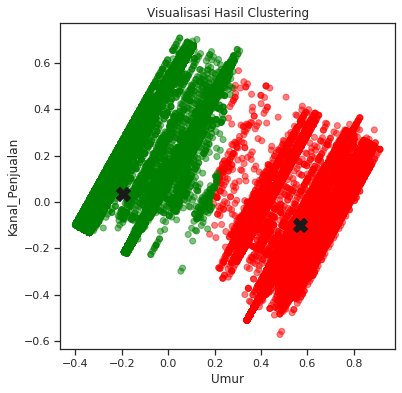

In [27]:
#PCA
centroids, clusters = kmeans(df_PCA, K=2, limit=300)
df_new = create_cluster(clusters)
plot_cluster(df_new)